# Multiple Linear Regression Analysis on Real Estate Valuation Dataset

This project implements a multiple linear regression model to predict house prices per unit area based on features like house age, distance to MRT stations, and more. The dataset is preprocessed, the model is fitted, and results are analyzed using ANOVA, hypothesis tests, and visualizations.

In [1]:
from Linear_Regression import MultipleLinearRegression as mlr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Regression analysis..


In [2]:
file_path = 'project_file\\Real_estate_valuation.xlsx'
data = pd.read_excel(file_path)

<span style="color: green; font-weight: bold; font-size: 30px;">Pre-Processing for regression analysis...</span>


In [3]:
data.head(5)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data = data.drop(data.columns[0], axis=1)

In [5]:
data.head(5)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# check missing values
print("Missing values: ", data.isnull().sum(), "\n")

Missing values:  transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64 



In [7]:
# check type
print("Data types: ", data.dtypes)

Data types:  transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [9]:
data.drop('transaction date', axis=1, inplace=True)

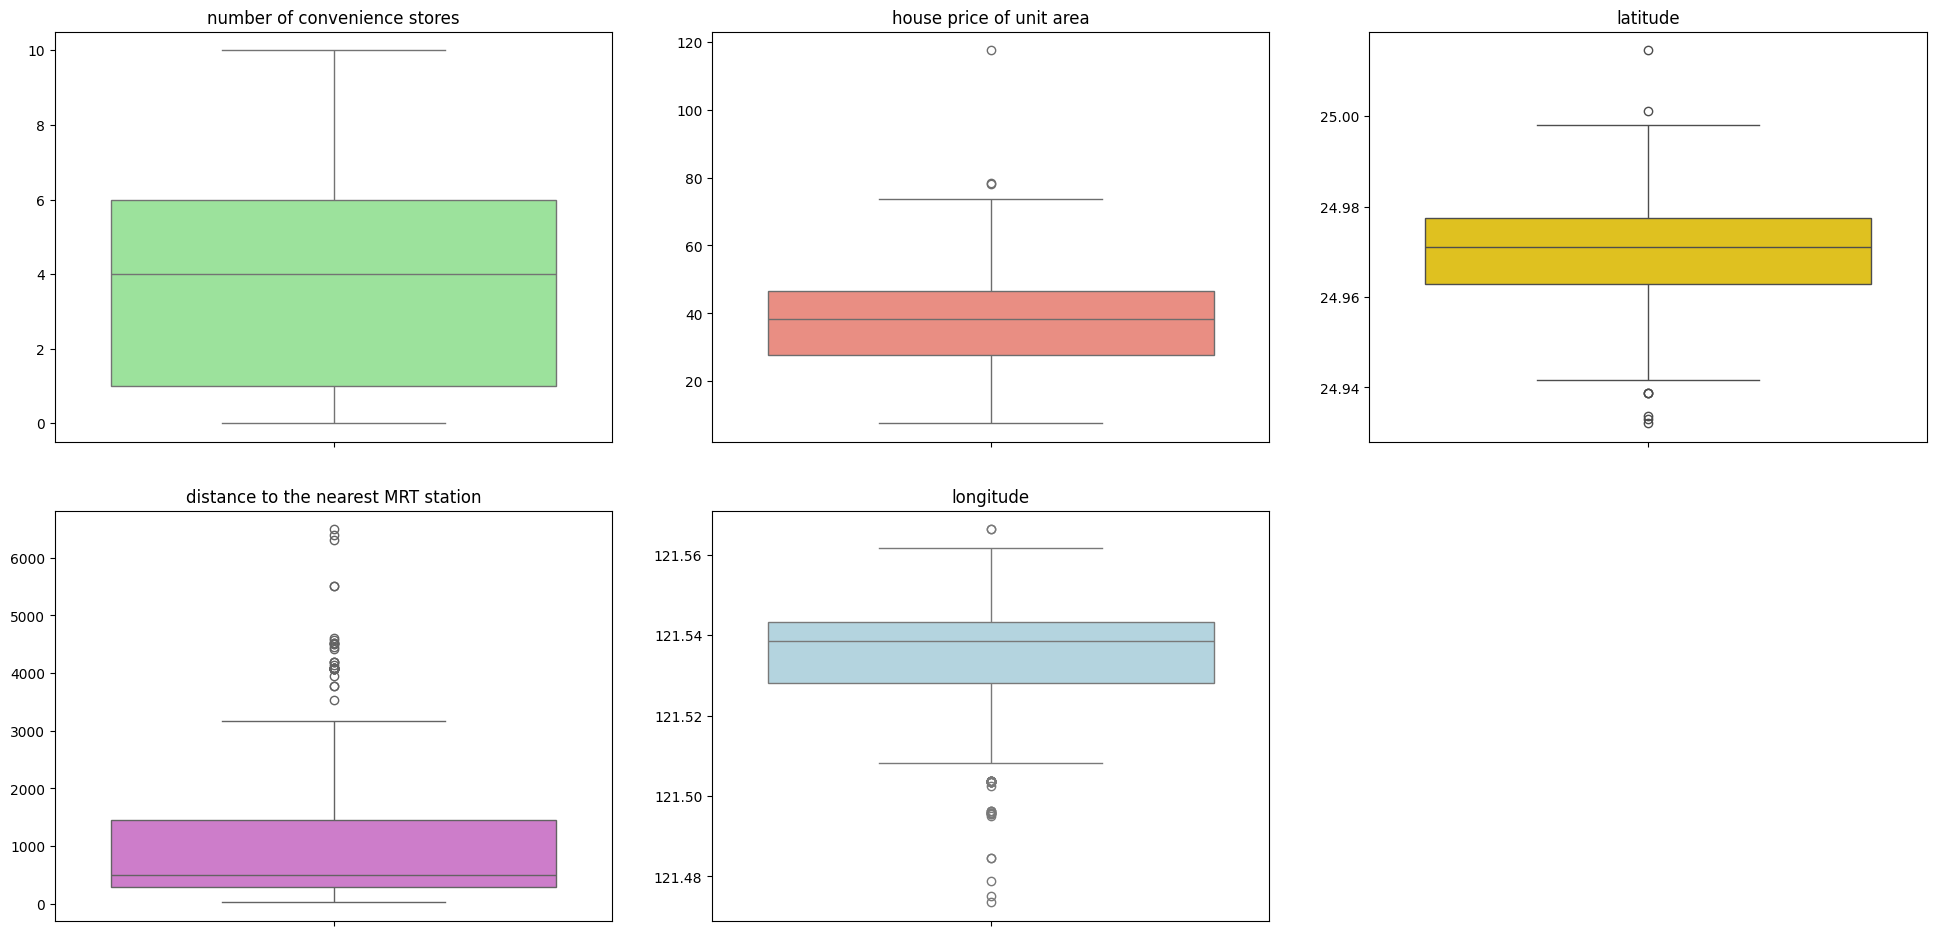

In [10]:
# Set up the figure with 2 rows and 4 columns
plt.figure(figsize=(20, 10))

# First row of plots
plt.subplot(2, 3, 1)
sns.boxplot(y=data['number of convenience stores'], color='lightgreen')
plt.title('number of convenience stores', fontsize=12)
plt.ylabel('')

plt.subplot(2, 3, 2)
sns.boxplot(y=data['house price of unit area'], color='salmon')
plt.title('house price of unit area', fontsize=12)
plt.ylabel('')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['latitude'], color='gold')
plt.title('latitude', fontsize=12)
plt.ylabel('')

# Second row of plots
plt.subplot(2, 3, 4)
sns.boxplot(y=data['distance to the nearest MRT station'], color='orchid')
plt.title('distance to the nearest MRT station', fontsize=12)
plt.ylabel('')

plt.subplot(2, 3, 5)
sns.boxplot(y=data['longitude'], color='lightblue')
plt.title('longitude', fontsize=12)
plt.ylabel('')

# Hide the last two subplots (7 and 8) since you only have 6 features
plt.subplot(2, 3, 6)
plt.axis('off')


plt.tight_layout(pad=3.0)
plt.show()

In [11]:
data.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
# features with outliers
features = [
    'house age',
    'distance to the nearest MRT station',
    'longitude'
]

# dropping outliers
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # drop outlier
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [13]:
data.shape

(323, 6)

In [14]:
# Explore statistical data
data.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,18.151393,530.124963,4.783282,24.972497,121.539754,42.109907
std,12.220242,442.992858,2.892929,0.009873,0.006753,12.150849
min,0.000000,23.382840,0.000000,24.948830,121.517260,7.600000
25%,8.200000,250.631000,2.000000,24.966740,121.537110,35.550000
50%,15.900000,390.568400,5.000000,24.974330,121.540690,41.500000
75%,30.650000,617.007950,7.000000,24.979370,121.543910,48.550000
max,43.800000,3171.329000,10.000000,25.001150,121.554810,117.500000


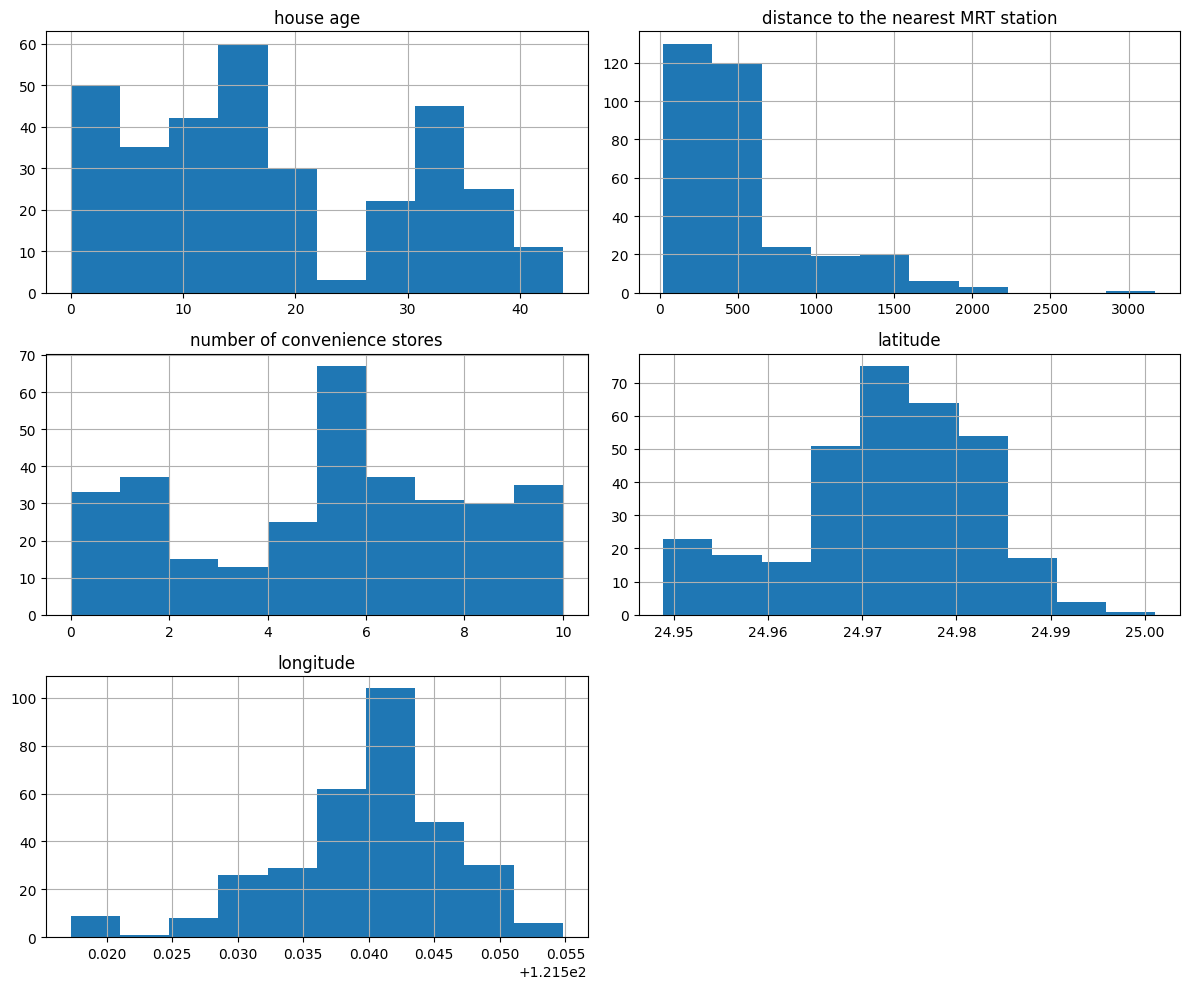

In [15]:
# Visualize distributions of features
data.drop(data.columns[-1], axis=1).hist(figsize=(12,10))
plt.tight_layout()
plt.show()

<span style="color: green; font-weight: bold; font-size: 30px;">Starting regression analysis...</span>

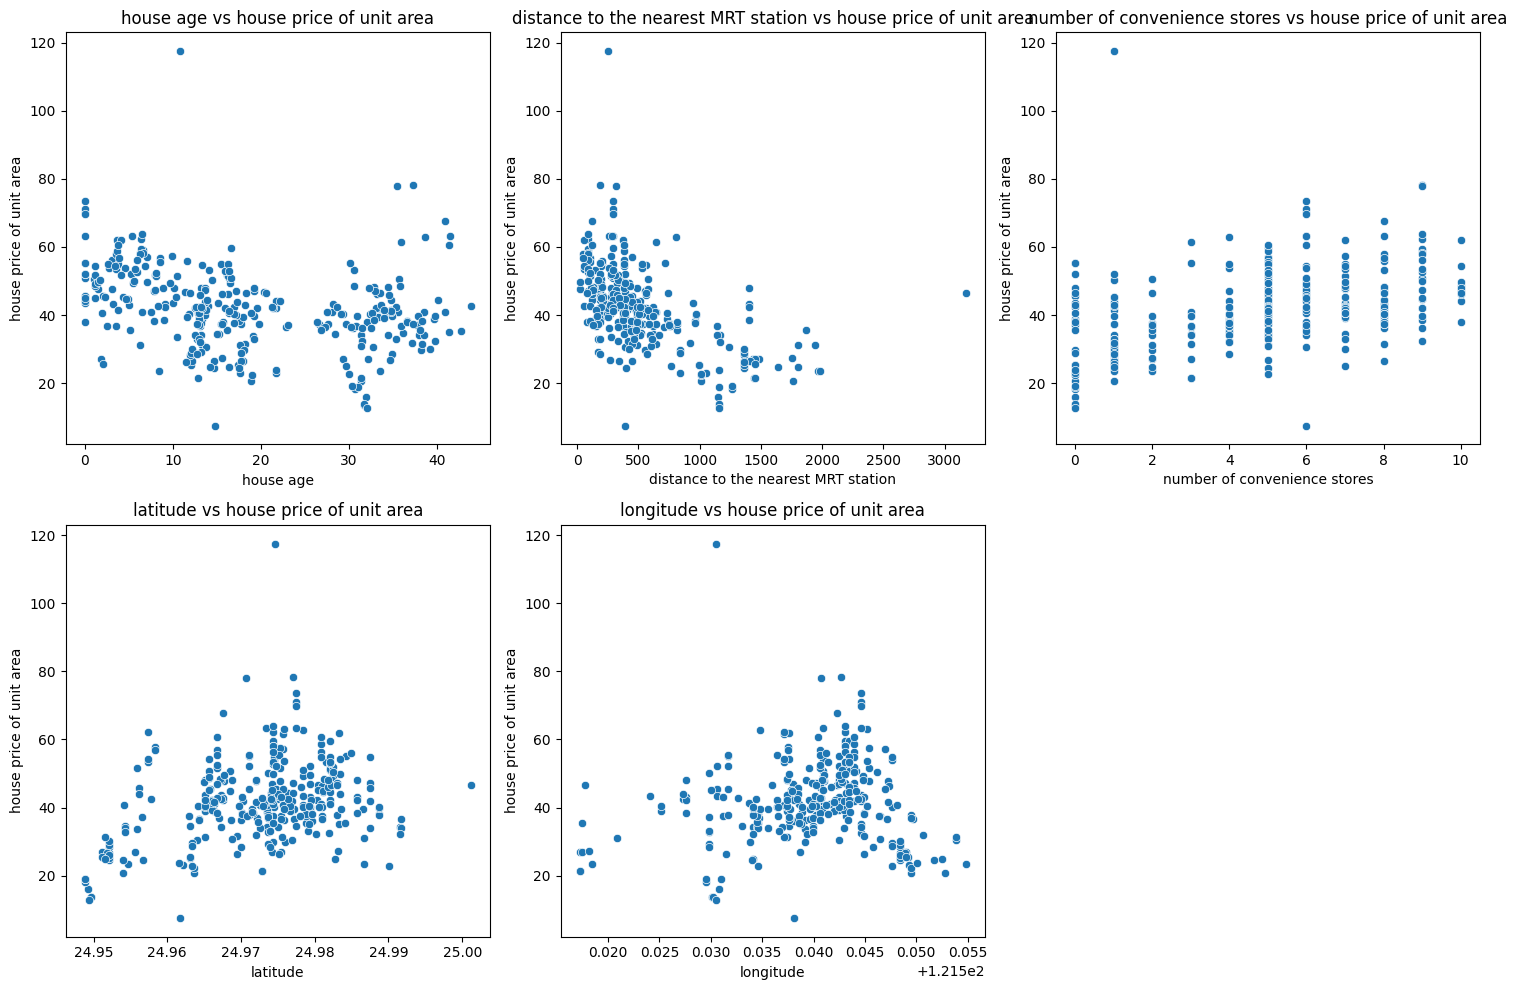

In [16]:
# Scatter plots of each feature vs target
features = data.columns[:-1]  # Target
target = 'house price of unit area'

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data[col], y=data[target])
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

In [17]:
# Extract matrices
y = data['house price of unit area'] # Coefficients
X = data.drop('house price of unit area', axis=1) # Target

In [18]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (258, 5)
Testing set size: (65, 5)


In [20]:
# Initializing the model
model = mlr()

# Fitting the model
model.fit(X=X_train, y=y_train)

In [21]:
# Print model summary
print("Model Summary:")
print(f"Intercept: {model.intercept:.2f}")
print(f"R-squared: {model.r_squared:.4f}")

Model Summary:
Intercept: 42.43
R-squared: 0.4462


In [22]:
# Evaluate the model

# Predict on test set
y_pred = model.predict(X_test)


In [23]:
# Calculate anova
anova_results = model.anova()


# Design anova table
anova_table = {
    'Source' : ["regression", "residual", "total"],
    'Sum_Squares' : [anova_results["SSR"], anova_results["SSE"], anova_results["SST"]],
    'DF' :  [anova_results["DF_regression"], anova_results["DF_residual"], anova_results["DF_total"]],
    'Mean_Squares' : [anova_results["MSR"], anova_results["MSE"], '   ']
}


anova_table_df = pd.DataFrame(anova_table)

anova_table_df

,Source,Sum_Squares,DF,Mean_Squares
0,regression,16675.500175,5,66.17262
1,residual,20693.703856,252,82.117872
2,total,37369.204031,257,


In [24]:
# Extract F0 from the anova results
f_stat = anova_results["F_statistic"]

print(f'The F_statistics is : {f_stat}')

The F_statistics is : 0.805824819497686


In [25]:
# Hypothesis test
test_results = model.hypothesis_test()

# Print the hypothesis
for result in test_results:
    print(f"{result['coefficient']}")
    print("-" * 30)
    print(f"Coefficient Value : {result['coefficient_value']}")
    print(f"T-Statistic       : {result['t_statistic']}")
    print(f"P-Value           : {result['p_value']}")
    print(f"Significant       : {result['significant']}")
    print()


B0
------------------------------
Coefficient Value : 42.43474113852456
T-Statistic       : 75.17415434494572
P-Value           : 0.0
Significant       : True

B1
------------------------------
Coefficient Value : -3.30264744365046
T-Statistic       : -5.831634871549497
P-Value           : 1.6755940857038354e-08
Significant       : True

B2
------------------------------
Coefficient Value : -4.67755607416622
T-Statistic       : -6.954882741105909
P-Value           : 3.023581385264151e-11
Significant       : True

B3
------------------------------
Coefficient Value : 1.800135785658287
T-Statistic       : 2.334875838230948
P-Value           : 0.02033573327346705
Significant       : True

B4
------------------------------
Coefficient Value : 3.3456590614768937
T-Statistic       : 5.434472291597255
P-Value           : 1.295864404671221e-07
Significant       : True

B5
------------------------------
Coefficient Value : 0.3086069869532755
T-Statistic       : 0.5081105406478531
P-Value       

In [26]:
# Calculate the interval estimation
confidence_intervals = model.interval_estimation()

for interval in confidence_intervals:
    print(f"{interval['coefficient']}")
    print("-" * 40)
    print(f"Coefficient Value : {interval['coefficient_value']}")
    print(f"Lower Bound       : {interval['lower_bound']}")
    print(f"Upper Bound       : {interval['upper_bound']}")
    print() 


B0
----------------------------------------
Coefficient Value : 42.43474113852456
Lower Bound       : 43.54645205825407
Upper Bound       : 41.32303021879505

B1
----------------------------------------
Coefficient Value : -3.30264744365046
Lower Bound       : -2.1872985091390067
Upper Bound       : -4.417996378161913

B2
----------------------------------------
Coefficient Value : -4.67755607416622
Lower Bound       : -3.3530069925163417
Upper Bound       : -6.002105155816098

B3
----------------------------------------
Coefficient Value : 1.800135785658287
Lower Bound       : 3.318515315276617
Upper Bound       : 0.28175625603995713

B4
----------------------------------------
Coefficient Value : 3.3456590614768937
Lower Bound       : 4.558107194251145
Upper Bound       : 2.1332109287026424

B5
----------------------------------------
Coefficient Value : 0.3086069869532755
Lower Bound       : 1.504759110542216
Upper Bound       : -0.887545136635665



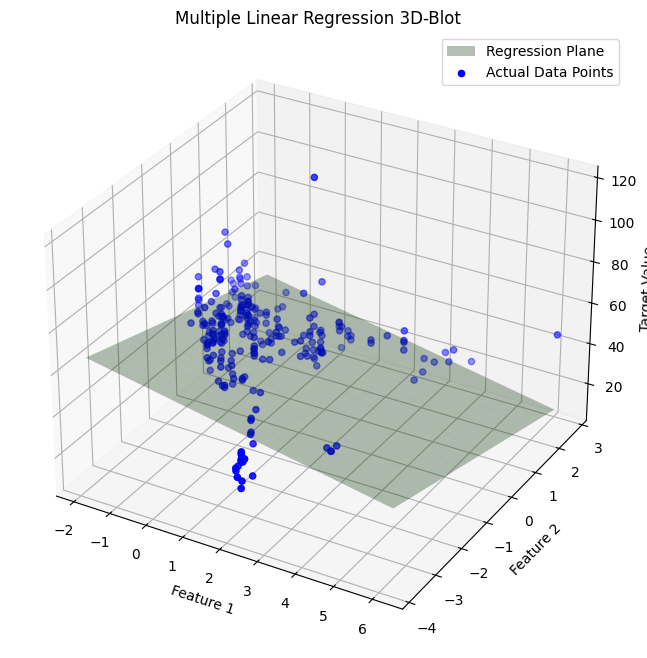

In [27]:
model.plot()